In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [844]:
owid_vpop_USA = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv')
owid_vpop_USA.sort_values(by=['location', 'date'])
owid_vpop_USA.loc[:, 'datetime'] = pd.to_datetime(owid_vpop_USA.loc[:, 'date'])
owid_vpop_USA = owid_vpop_USA.set_index(['location', 'datetime'], drop=False)
owid_vpop_USA.rename_axis(['location_index', 'datetime_index'], axis='index', inplace=True)
# owid_vpop_USA.asfreq(freq='D')

owid_vpop_USA.head()

date location  total_vaccinations  \
location_index datetime_index                                            
Alabama        2021-01-12      2021-01-12  Alabama             78134.0   
               2021-01-13      2021-01-13  Alabama             84040.0   
               2021-01-14      2021-01-14  Alabama             92300.0   
               2021-01-15      2021-01-15  Alabama            100567.0   
               2021-01-16      2021-01-16  Alabama                 NaN   

                               total_distributed  people_vaccinated  \
location_index datetime_index                                         
Alabama        2021-01-12               377025.0            70861.0   
               2021-01-13               378975.0            74792.0   
               2021-01-14               435350.0            80480.0   
               2021-01-15               444650.0            86956.0   
               2021-01-16                    NaN                NaN   

                               people_fully_vaccinated_per_hundred  \
location_index datetime_index                                        
Alabama        2021-01-12                                     0.15   
               2021-01-13                                     0.19   
               2021-01-14                                      NaN   
               2021-01-15                                     0.28   
               2021-01-16                                      NaN   

                               total_vaccinations_per_hundred  \
location_index datetime_index                                   
Alabama        2021-01-12                                1.59   
               2021-01-13                                1.71   
               2021-01-14                                1.88   
               2021-01-15                                2.05   
               2021-01-16                                 NaN   

                               people_fully_vaccinated  \
location_index datetime_index                            
Alabama        2021-01-12                       7270.0   
               2021-01-13                       9245.0   
               2021-01-14                          NaN   
               2021-01-15                      13488.0   
               2021-01-16                          NaN   

                               people_vaccinated_per_hundred  \
location_index datetime_index                                  
Alabama        2021-01-12                               1.45   
               2021-01-13                               1.53   
               2021-01-14                               1.64   
               2021-01-15                               1.77   
               2021-01-16                                NaN   

                               distributed_per_hundred  \
location_index datetime_index                            
Alabama        2021-01-12                         7.69   
               2021-01-13                         7.73   
               2021-01-14                         8.88   
               2021-01-15                         9.07   
               2021-01-16                          NaN   

                               daily_vaccinations_raw  daily_vaccinations  \
location_index datetime_index                                               
Alabama        2021-01-12                         NaN                 NaN   
               2021-01-13                      5906.0              5906.0   
               2021-01-14                      8260.0              7083.0   
               2021-01-15                      8267.0              7478.0   
               2021-01-16                      7557.0              7498.0   

                               daily_vaccinations_per_million  \
location_index datetime_index                                   
Alabama        2021-01-12                                 NaN   
               2021-01-13                              1205.0   
          

In [657]:
owid_vpop_USA.index.levels[1].freq='D'

In [658]:
StateNames = ['Washington', 'Alabama', 'Texas']
StateList = [ owid_vpop_USA.loc[State] for State in StateNames ]

Text(0.5, 1.0, 'Vaccination Rate in US States')

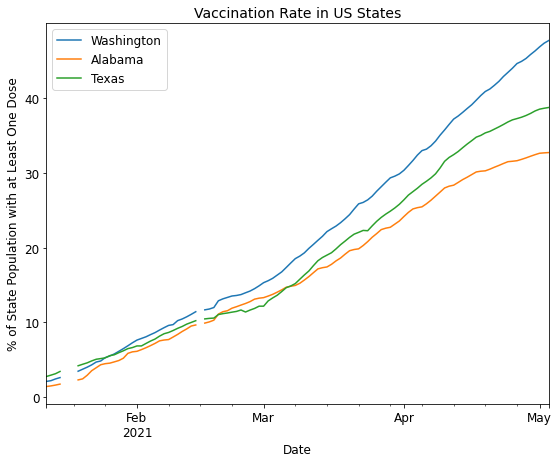

In [659]:
for State in StateNames:
    pc_full_fig = owid_vpop_USA.loc[State, 'people_vaccinated_per_hundred'].plot(figsize=(9,7))
plt.legend(StateNames, fontsize=12)
# pc_full_fig.axis_params(labelsize=12)
pc_full_fig.tick_params(labelsize=12)
plt.xlabel('Date', fontdict={'size': 12})
plt.ylabel('% of State Population with at Least One Dose', fontdict={'size': 12})
plt.title('Vaccination Rate in US States', fontdict={'size': 14})

In [660]:
# Random Forest model function

from sklearn.ensemble import RandomForestRegressor

def get_random_forest_mae(X_trn, X_tst, y_trn, y_tst):
    vax_model = RandomForestRegressor(random_state=1)
    vax_model.fit(X_trn, y_trn)
    y_tst_prd = vax_model.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(y_tst_prd, mae)

In [661]:
# def rf_pred(State):

#     y = owid_vpop_USA.loc[State, 'people_vaccinated_per_hundred'].asfreq('D') # use percent of population with >= 1 vaccine as y-variable
#     X = owid_vpop_USA.loc[State].index # use datetime as x-variable
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#     y_test_pred, mae = get_random_forest_mae(X_train, X_test, y_train, y_test)
    
#     plt.plot(pd.concat([X_train, X_test]), pd.concat([y_train, y_test]))
#     plt.plot(pd.concat([X_train, X_test]), pd.concat([y_train, y_test_pred]))
    
#     vax_model = RandomForestRegressor(random_state=1)
#     vax_model.fit(X_trainn, y_train)
#     y_test_pred = vax_model.predict(X_test)
#     mae = mean_absolute_error(y_test, y_test_pred)
    
#     return(y_test_pred, mae)

# #     Y_list.append()
# #     X_list.append()
# #     X_train_list.append(x_train)

In [662]:
owid_vpop_USA['people_vaccinated_per_hundred']

location_index  datetime_index
Alabama         2021-01-12         1.45
                2021-01-13         1.53
                2021-01-14         1.64
                2021-01-15         1.77
                2021-01-16          NaN
                                  ...  
Wyoming         2021-04-29        33.85
                2021-04-30        33.94
                2021-05-01        34.07
                2021-05-02        34.10
                2021-05-03        34.10
Name: people_vaccinated_per_hundred, Length: 7303, dtype: float64

In [663]:
X_train.dtypes

total_vaccinations    float64
total_distributed     float64
dtype: object

In [664]:
df_test_pred[y_col].values

KeyError: 'people_vaccinated_per_hundred'

In [ ]:
y.asfreq(freq='D')

In [ ]:
y = owid_vpop_USA_clean.loc[State, y_col].asfreq('D').fillna(method='ffill') # use percent of population with >= 1 vaccine as y-variable
X = owid_vpop_USA_clean.loc[State, X_cols] # use datetime as x-variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# y_test_pred_df = y_test.copy()

# vax_model = RandomForestRegressor(random_state=1)
# vax_model.fit(X_train, y_train)
# y_test_pred_ar = vax_model.predict(X_test)

# y_test_pred_df = pd.DataFrame(y_test_pred, index=y_test.index)

# mae = mean_absolute_error(y_test, y_test_pred)

# # y_real_df = 
# # y_pred_df = 

# df_real = pd.concat([X_train, X_test]).join(pd.concat([y_train, y_test]))
# df_test_pred = X_test.join(y_test_pred_df)

# df_real[y_col].plot(figsize=(9,7))
# df_test_pred[y_col].plot(figsize=(9,7))
# plt.plot(df_test_pred[X_cols], df_test_pred['people_vaccinated_per_hundred'])
# plt.plot(, )
# plt.plot(np.concatenate([X_train, X_test]), np.concatenate([y_train, y_test_pred]))



In [ ]:
X.index.freq

In [522]:
owid_vpop_USA_clean.loc[State, y_col]

datetime_index
2021-01-12     2.79
2021-01-13     2.97
2021-01-14     3.16
2021-01-15     3.46
2021-01-19     4.22
              ...  
2021-04-27    37.42
2021-04-28    37.65
2021-04-29    37.93
2021-04-30    38.26
2021-05-01    38.50
Name: people_vaccinated_per_hundred, Length: 106, dtype: float64

In [823]:
X_cols = ['total_vaccinations', 'total_distributed']
y_col = 'people_vaccinated_per_hundred'
owid_vpop_USA_clean = owid_vpop_USA.dropna(subset=X_cols+[y_col])

In [513]:
owid_vpop_USA_clean[X_cols+[y_col]].isna().sum()

total_vaccinations               0
total_distributed                0
people_vaccinated_per_hundred    0
dtype: int64

In [556]:
y_test

datetime_index
2021-01-12     2.79
2021-01-13     2.97
2021-01-14     3.16
2021-01-15     3.46
2021-01-16     3.46
              ...  
2021-04-27    37.42
2021-04-28    37.65
2021-04-29    37.93
2021-04-30    38.26
2021-05-01    38.50
Freq: D, Name: people_vaccinated_per_hundred, Length: 110, dtype: float64

In [762]:
# tutorial from https://analyticsindiamag.com/sktime-library/

from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import smape_loss

# y = load_airline()
y = y_clean
# y_train, y_test = temporal_train_test_split(y, train_size=0.9)
y_train = 
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(deseasonalize=True, sp=38)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_test_pred = forecaster.predict(fh)
smape_loss(y_test, y_test_pred)

0.014098575987584782

In [767]:
round(len(y))

110

<AxesSubplot:xlabel='datetime_index'>

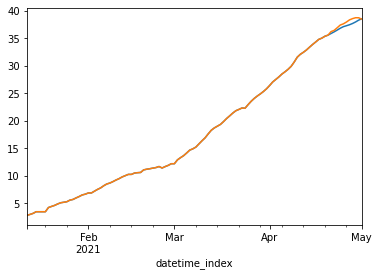

In [760]:
y.plot()
pd.concat([y_train, y_test_pred]).plot()

In [747]:
from sklearn.ensemble import RandomForestRegressor

def get_mdl_mae(X_trn, X_tst, y_trn, y_tst, mdl):
    vax_model = mdl
    vax_model.fit(X_trn, y_trn)
    y_tst_prd = vax_model.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(y_tst_prd, mae)

In [715]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [841]:
def df_cleaner(df_orig):

    df = df_orig.copy()
    
    df.sort_values(by=['location', 'date'])
    df.loc[:, 'datetime'] = pd.to_datetime(df.loc[:, 'date'])
    df = df.set_index(['location', 'datetime'], drop=False)
    df.rename_axis(['location_index', 'datetime_index'], axis='index', inplace=True)
    # owid_vpop_USA.asfreq(freq='D')
    
    # df.fillna(method='ffill', inplace=True)
    # df.dropna(inplace=True)
    
    return df

In [842]:
df_orig = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv')

df_clean = df_cleaner(df_orig)

In [835]:
df_clean

date location  total_vaccinations  \
location_index datetime_index                                            
Alabama        2021-01-13      2021-01-13  Alabama             84040.0   
               2021-01-14      2021-01-14  Alabama             92300.0   
               2021-01-15      2021-01-15  Alabama            100567.0   
               2021-01-16      2021-01-16  Alabama            100567.0   
               2021-01-17      2021-01-17  Alabama            100567.0   
...                                   ...      ...                 ...   
Wyoming        2021-04-29      2021-04-29  Wyoming            353401.0   
               2021-04-30      2021-04-30  Wyoming            356057.0   
               2021-05-01      2021-05-01  Wyoming            358222.0   
               2021-05-02      2021-05-02  Wyoming            358512.0   
               2021-05-03      2021-05-03  Wyoming            358545.0   

                               total_distributed  people_vaccinated  \
location_index datetime_index                                         
Alabama        2021-01-13               378975.0            74792.0   
               2021-01-14               435350.0            80480.0   
               2021-01-15               444650.0            86956.0   
               2021-01-16               444650.0            86956.0   
               2021-01-17               444650.0            86956.0   
...                                          ...                ...   
Wyoming        2021-04-29               478185.0           195885.0   
               2021-04-30               479485.0           196453.0   
               2021-05-01               483195.0           197208.0   
               2021-05-02               483195.0           197340.0   
               2021-05-03               483195.0           197374.0   

                               people_fully_vaccinated_per_hundred  \
location_index datetime_index                                        
Alabama        2021-01-13                                     0.19   
               2021-01-14                                     0.19   
               2021-01-15                                     0.28   
               2021-01-16                                     0.28   
               2021-01-17                                     0.28   
...                                                            ...   
Wyoming        2021-04-29                                    27.42   
               2021-04-30                                    27.76   
               2021-05-01                                    28.01   
               2021-05-02                                    28.05   
               2021-05-03                                    28.05   

                               total_vaccinations_per_hundred  \
location_index datetime_index                                   
Alabama        2021-01-13                                1.71   
               2021-01-14                                1.88   
               2021-01-15                                2.05   
               2021-01-16                                2.05   
               2021-01-17                                2.05   
...                                                       ...   
Wyoming        2021-04-29                               61.06   
               2021-04-30                               61.52   
               2021-05-01                               61.89   
               2021-05-02                               61.94   
               2021-05-03                               61.95   

                               people_fully_vaccinated  \
location_index datetime_index                            
Alabama        2021-01-13                       9245.0   
               2021-01-14                       9245.0   
               2021-01-15                      13488.0   
               2021-01-16                      13488.0   
               2021-01-17                    

In [818]:
def get_mdl_mae(X_trn, X_tst, y_trn, y_tst, mdl):
    vax_model = mdl
    vax_model.fit(X_trn, y_trn)
    y_tst_prd = vax_model.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(y_tst_prd, mae)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
train

get_mdl_mae()

In [819]:
from sklearn.linear_model import LinearRegression

def get_mdl_mae(X_trn, X_tst, y_trn, y_tst, mdl):
    vax_model = mdl
    vax_model.fit(X_trn, y_trn)
    y_tst_prd = vax_model.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(y_tst_prd, mae)

In [820]:
from sklearn.model_selection import train_test_split # to split data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

get_mdl_mae(X_trn, X_tst, y_trn, y_tst, mdl)

ValueError: Found input variables with inconsistent numbers of samples: [106, 110]

In [787]:
hey.loc['Alabama']['2021-01-12' : '2021-01-15']

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,datetime
datetime_index,,,,,,,,,,,,,,,
2021-01-12,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,2021-01-12
2021-01-13,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,2021-01-13
2021-01-14,2021-01-14,Alabama,92300.0,435350.0,80480.0,0.19,1.88,9245.0,1.64,8.88,8260.0,7083.0,1445.0,0.212,2021-01-14
2021-01-15,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,2021-01-15


In [801]:
string_date = '2021-01-12', '2021-01-15'

In [ ]:
datefrom

In [808]:
ListofDates = ['1', '2', '3', '4']

datetime.datetime.strptime('2021-01-12', '%Y-%m-%d')

datetime.datetime(2021, 1, 12, 0, 0)

In [790]:
import datetime

In [793]:
datetime.datetime(2021,1,12)

datetime.datetime(2021, 1, 12, 0, 0)

In [ ]:
def getStateData(df, ListofStates, train_dates, test_dates):
    for Stateidx, State in enumerate(ListofStates):
        df.loc[State][train_date[0]:]        

In [744]:
hey

date location  total_vaccinations  \
location_index datetime_index                                            
Alabama        2021-01-12      2021-01-12  Alabama             78134.0   
               2021-01-13      2021-01-13  Alabama             84040.0   
               2021-01-14      2021-01-14  Alabama             92300.0   
               2021-01-15      2021-01-15  Alabama            100567.0   
               2021-01-16      2021-01-16  Alabama            100567.0   
...                                   ...      ...                 ...   
Wyoming        2021-04-29      2021-04-29  Wyoming            353401.0   
               2021-04-30      2021-04-30  Wyoming            356057.0   
               2021-05-01      2021-05-01  Wyoming            358222.0   
               2021-05-02      2021-05-02  Wyoming            358512.0   
               2021-05-03      2021-05-03  Wyoming            358545.0   

                               total_distributed  people_vaccinated  \
location_index datetime_index                                         
Alabama        2021-01-12               377025.0            70861.0   
               2021-01-13               378975.0            74792.0   
               2021-01-14               435350.0            80480.0   
               2021-01-15               444650.0            86956.0   
               2021-01-16               444650.0            86956.0   
...                                          ...                ...   
Wyoming        2021-04-29               478185.0           195885.0   
               2021-04-30               479485.0           196453.0   
               2021-05-01               483195.0           197208.0   
               2021-05-02               483195.0           197340.0   
               2021-05-03               483195.0           197374.0   

                               people_fully_vaccinated_per_hundred  \
location_index datetime_index                                        
Alabama        2021-01-12                                     0.15   
               2021-01-13                                     0.19   
               2021-01-14                                     0.19   
               2021-01-15                                     0.28   
               2021-01-16                                     0.28   
...                                                            ...   
Wyoming        2021-04-29                                    27.42   
               2021-04-30                                    27.76   
               2021-05-01                                    28.01   
               2021-05-02                                    28.05   
               2021-05-03                                    28.05   

                               total_vaccinations_per_hundred  \
location_index datetime_index                                   
Alabama        2021-01-12                                1.59   
               2021-01-13                                1.71   
               2021-01-14                                1.88   
               2021-01-15                                2.05   
               2021-01-16                                2.05   
...                                                       ...   
Wyoming        2021-04-29                               61.06   
               2021-04-30                               61.52   
               2021-05-01                               61.89   
               2021-05-02                               61.94   
               2021-05-03                               61.95   

                               people_fully_vaccinated  \
location_index datetime_index                            
Alabama        2021-01-12                       7270.0   
               2021-01-13                       9245.0   
               2021-01-14                       9245.0   
               2021-01-15                      13488.0   
               2021-01-16                    

In [720]:
df_orig = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv')

In [ ]:
def rf_pred(State):

    y = owid_vpop_USA.loc[State, 'people_vaccinated_per_hundred'].asfreq('D') # use percent of population with >= 1 vaccine as y-variable
    X = owid_vpop_USA.loc[State].index # use datetime as x-variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    y_test_pred, mae = get_random_forest_mae(X_train, X_test, y_train, y_test)

    plt.plot(pd.concat([X_train, X_test]), pd.concat([y_train, y_test]))
    plt.plot(pd.concat([X_train, X_test]), pd.concat([y_train, y_test_pred]))

    vax_model = RandomForestRegressor(random_state=1)
    vax_model.fit(X_trainn, y_train)
    y_test_pred = vax_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_test_pred)

    return(y_test_pred, mae)

    Y_list.append()
    X_list.append()
    X_train_list.append(x_train)

In [714]:
mdlRfsVax = RandomForestRegressor()
get_mdl_mae(X_train, X_test, y_train, y_test, mdlRfsVax)

ValueError: Found input variables with inconsistent numbers of samples: [84, 82]

In [48]:
from sklearn.model_selection import train_test_split # to split data into training and testing data
from sklearn.metrics import mean_absolute_error # to evaluate model with mean absolute error

In [700]:
y_train, y_test = train_test_split(y)

y_pred, rfs_mae = get_mdl_mae(np.array(y_train.index).reshape(-1, 1), np.array(y_test.index).reshape(-1, 1), y_train, y_test)

<AxesSubplot:xlabel='datetime_index'>

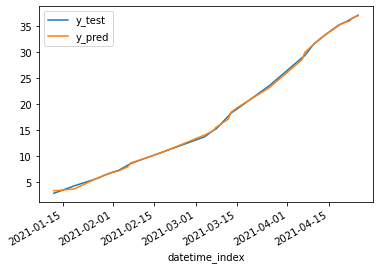

In [711]:
RandomForestRegressor(random_state=1)
df_plot_rfs = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred}, index=y_test.index)
df_plot_rfs.plot()

In [706]:
y_pred.shape

(28,)

In [48]:
from sklearn.model_selection import train_test_split # to split data into training and testing data
from sklearn.metrics import mean_absolute_error # to evaluate model with mean absolute error

In [839]:
y = df_clean.loc['Alabama']
X = df_clean.loc['Alabama'].drop('')

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,datetime
datetime_index,,,,,,,,,,,,,,,
2021-01-13,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,2021-01-13
2021-01-14,2021-01-14,Alabama,92300.0,435350.0,80480.0,0.19,1.88,9245.0,1.64,8.88,8260.0,7083.0,1445.0,0.212,2021-01-14
2021-01-15,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,2021-01-15
2021-01-16,2021-01-16,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,7557.0,7498.0,1529.0,0.226,2021-01-16
2021-01-17,2021-01-17,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,7557.0,7509.0,1531.0,0.226,2021-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-29,2021-04-29,Alabama,2559938.0,4042070.0,1579093.0,22.87,52.21,1121348.0,32.21,82.44,32123.0,23662.0,4826.0,0.633,2021-04-29
2021-04-30,2021-04-30,Alabama,2591163.0,4088030.0,1589518.0,23.32,52.85,1143488.0,32.42,83.37,31225.0,23076.0,4706.0,0.634,2021-04-30
2021-05-01,2021-05-01,Alabama,2617405.0,4130550.0,1599130.0,23.69,53.38,1161725.0,32.61,84.24,26242.0,22271.0,4542.0,0.634,2021-05-01


In [840]:
# help(train_test_split)

In [221]:
X_train.columns

Index(['dayofweek', 'Days_since_measurement', 'Confirmed', 'Recovered',
       'Active', 'Incident_Rate'],
      dtype='object')

In [188]:
# type(X['weekofyear'].iloc[0])

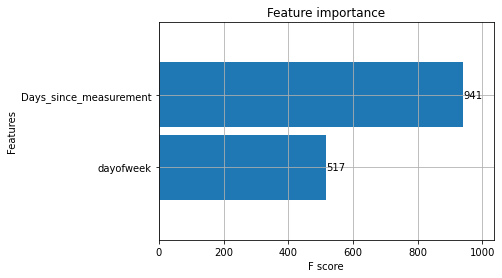

In [190]:
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree

def get_xgb_regressor_mae(X_trn, X_tst, y_trn, y_tst):
    vax_model = XGBRegressor(random_state=1)
    vax_model.fit(X_trn, y_trn)
    y_tst_prd = vax_model.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    _ = plot_importance(vax_model, height=0.9)
    return

get_xgb_regressor_mae(X_train, X_test, y_train, y_test)

In [222]:
vax_model = RandomForestRegressor(random_state=1)
vax_model.fit(X_train, y_train)
y_test_pred = vax_model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
mae

<ipython-input-222-d2afc9e55bbf>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  vax_model.fit(X_train, y_train)


1303.8633333333332

In [827]:
y

datetime_index
2021-01-12     2.79
2021-01-13     2.97
2021-01-14     3.16
2021-01-15     3.46
2021-01-16     3.46
              ...  
2021-04-27    37.42
2021-04-28    37.65
2021-04-29    37.93
2021-04-30    38.26
2021-05-01    38.50
Freq: D, Name: people_vaccinated_per_hundred, Length: 110, dtype: float64

In [225]:
mae/np.mean(y['Doses_admin'])*100

2.9823707210178774

In [210]:
y.copy().values.ravel()

array([  7829.,   8383.,   8928.,   8928.,   9611.,  12996.,  13236.,
        13236.,  13236.,  13236.,  18928.,  22266.,  25196.,  26423.,
        26563.,  26563.,  26563.,  29170.,  33414.,  33414.,  35976.,
        38191.,  38191.,  38191.,  40981.,  43992.,  46775.,  46775.,
        46775.,  56831.,  56831.,  60317.,  60775.,  60775.,  67600.,
        71858.,  71858.,  83554.,  92603.,  92603.,  95682.,  99099.,
        99099., 100186.])